In [345]:
import chess.pgn
import json
from heapq import nlargest
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, draw, show

In [ ]:
def parser():
  pgn_filepath = "/content/drive/MyDrive/lichess_db_standard_rated_2017-02.pgn"  # 10 million game pgns
  with open(pgn_filepath) as pgn_file:  # opens them up
    main_list = []
    length = 5000000
    for i in range(length):
      game = chess.pgn.read_game(pgn_file)
      white_elo = (game.headers["WhiteElo"])
      black_elo = (game.headers["BlackElo"])
      pgn = {game.headers["Opening"]}
      if ":" in pgn:     
        # cleans up the openings, so they aren't the very specific variations
        pgn = (pgn[:pgn.find(":")])
      if "," in pgn:
        pgn = (pgn[:pgn.find(",")])
      if " #" in pgn:
        pgn = (pgn[:pgn.find(" #")])

      pgn_opening = pgn


      time_control = (game.headers["TimeControl"])
      link = (game.headers["Site"])
      result = game.headers["Result"]


      each_game_list = []
      each_game_list.append((white_elo, black_elo, pgn_opening, time_control, link, result))
      # return only the useful things, that I will need
      main_list.append(each_game_list)
      
  return main_list

main_list = parser()
with open("pgn_data.json", "w") as pgn_data:  # make a json, so I only have to parse these files once
    json.dump(main_list, pgn_data)

In [2]:
with open("/content/drive/MyDrive/compressed_pgn_data.json") as f:
    pgn_file = json.load(f)  # I have to save the pgn_file manually in the google drive
    # but now it automatically op
print(len(pgn_file))
main_list = pgn_file
print(main_list[10])


5000000
[['2454', '2409', 'Neo-Gruenfeld Defense', '180+0', 'https://lichess.org/CaIRufMD', '1-0']]


In [295]:
opening_lists = {600:[], 1000:[],  1200:[],  1300:[], 1400:[], 
 1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}

all_openings = {600:{}, 1000:{}, 1200:{}, 1300:{}, 1400:{},
 1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}

opening_wins = {600:{}, 1000:{}, 1200:{}, 1300:{}, 1400:{},
                1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}

opening_win_ratios = {600:{}, 1000:{}, 1200:{}, 1300:{}, 1400:{},
                1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}  
          
# creating lists that are used to store all the opening info, which is unique
# to each rating band

rating_categorisation = [600, 1000, 1200, 1300, 1400,
                         1500, 1600, 1700, 1800, 1900, 2100]

# for reference, every time there is rating_categorisation[i] that just means that it
# is looping through these values, so you can do it for all the rating bands

# for i in range(len(main_list)):
for i in range(len(pgn_file)):


      black_rating = main_list[i][0][1]
      white_rating = main_list[i][0][0]
      opening = main_list[i][0][2]
      result = main_list[i][0][5]
      if -100 < int(white_rating) - int(black_rating) < 100:  # if they are separated by more
      # than 200 rating points, they won't be included
        average_rating = (int(black_rating) + int(white_rating))/2
      else:
        continue
 
      for j in range(len(rating_categorisation)):
        if rating_categorisation[j-1] < int(white_rating) < rating_categorisation[j]:
          white_rating_band = rating_categorisation[j-1]
          # print(white_rating_band)
          break


      if int(white_rating) > 2100:
        white_rating_band = 2100
      # print(white_rating, white_rating_band)
      if opening not in opening_lists[white_rating_band]:
        all_openings[white_rating_band][opening] = 1
      
      elif opening in opening_lists[white_rating_band]:
      
        all_openings[white_rating_band][opening] += 1

      if result == "1-0" and opening not in opening_lists[white_rating_band]:
        opening_wins[white_rating_band][opening] = 1

      elif result == "1-0" and opening in opening_lists[white_rating_band]:
        opening_wins[white_rating_band][opening] += 1  # adds the openings to 
        # dictionaries, to count the number of times each one is played
        # in each rating band, as well as the number of time that each one wins
      
      else: 
        continue
      
      if opening not in opening_lists[white_rating_band]:
        opening_lists[white_rating_band].append(opening)

In [296]:
def win_ratio(rating_band):
  win_ratio = {}
  for key, value in all_openings[rating_band].items():
    
    denominater = (value)
    try:
      numerator = (opening_wins[rating_band][key])
    except:
      numerator = 0  # might be the source of bugs
    ratio = numerator/denominater
    win_ratio[key] = round(ratio, 2) 
  return win_ratio   # finds the win ratio of each rating, so we know how successful 
  # each opening is    

for i in range(len(rating_categorisation)):
  opening_win_ratios[rating_categorisation[i]] = win_ratio(rating_categorisation[i])

print(opening_win_ratios)

{600: {'Amar Opening': 0.4, 'English Opening': 0.45, 'Sicilian Defense': 0.5, 'Italian Game': 0.46, 'Vienna Game': 0.48, 'Blackmar-Diemer Gambit': 0.54, "King's Gambit Declined": 0.41, 'Van Geet Opening': 0.4, 'Russian Game': 0.52, "Queen's Pawn Game": 0.46, "Queen's Gambit Refused": 0.59, 'Horwitz Defense': 0.42, 'French Defense': 0.41, "King's Pawn Game": 0.47, "Van't Kruijs Opening": 0.47, 'Nimzowitsch Defense': 0.5, 'Alekhine Defense': 0.48, 'Dutch Defense': 0.34, "Bishop's Opening": 0.51, 'Mieses Opening': 0.42, 'Duras Gambit': 0.58, 'Philidor Defense': 0.5, 'Center Game': 0.51, 'Owen Defense': 0.53, "Queen's Pawn": 0.44, 'Modern Defense': 0.5, 'Englund Gambit Declined': 0.46, 'Zukertort Opening': 0.42, 'Scandinavian Defense': 0.46, 'Guatemala Defense': 0.5, "Queen's Gambit Declined": 0.67, 'Amazon Attack': 0.33, 'Crab Opening': 0.5, 'Bird Opening': 0.36, "King's Pawn Opening": 0.48, 'Indian Game': 0.45, 'Ponziani Opening': 0.53, 'Clemenz Opening': 0.62, 'Pirc Defense': 0.49, "Kin

In [297]:
dubious_openings = ["King's Pawn", "King's Knight", "Queen's Pawn", 
"Queen's Gambit Refused","Englund", 
  "Elephant", "Duras", "Defense", "Defence", "Indian", "System"]
# for example, King's pawn is where e4 is played, and then the 
# rest of the moves are not from the opening book, so no use
# for my data.
# getting rid of defense, as this analysing the best openings for white, not black
# and there are near 0 openings put forward by white, which are called "defense"
for i in range(len(rating_categorisation)):
  for key, value in opening_win_ratios[rating_categorisation[i]].items():
    for substring in dubious_openings:  # gets rid of all openings from dubious openings
    # you can see the original win ratio, as it is just 0.0 followed by the original win_ratio
      if substring in key:
        opening_win_ratios[rating_categorisation[i]][key] = float(f"0.0{str(opening_win_ratios[rating_categorisation[i]][key])[2:]}")
        break
print(opening_win_ratios)
print(all_openings)

{600: {'Amar Opening': 0.4, 'English Opening': 0.45, 'Sicilian Defense': 0.05, 'Italian Game': 0.46, 'Vienna Game': 0.48, 'Blackmar-Diemer Gambit': 0.54, "King's Gambit Declined": 0.41, 'Van Geet Opening': 0.4, 'Russian Game': 0.52, "Queen's Pawn Game": 0.046, "Queen's Gambit Refused": 0.059, 'Horwitz Defense': 0.042, 'French Defense': 0.041, "King's Pawn Game": 0.047, "Van't Kruijs Opening": 0.47, 'Nimzowitsch Defense': 0.05, 'Alekhine Defense': 0.048, 'Dutch Defense': 0.034, "Bishop's Opening": 0.51, 'Mieses Opening': 0.42, 'Duras Gambit': 0.058, 'Philidor Defense': 0.05, 'Center Game': 0.51, 'Owen Defense': 0.053, "Queen's Pawn": 0.044, 'Modern Defense': 0.05, 'Englund Gambit Declined': 0.046, 'Zukertort Opening': 0.42, 'Scandinavian Defense': 0.046, 'Guatemala Defense': 0.05, "Queen's Gambit Declined": 0.67, 'Amazon Attack': 0.33, 'Crab Opening': 0.5, 'Bird Opening': 0.36, "King's Pawn Opening": 0.048, 'Indian Game': 0.045, 'Ponziani Opening': 0.53, 'Clemenz Opening': 0.62, 'Pirc D

In [298]:
best_openings_list = {600:[], 1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}
best_openings_ratio_list = {600:[], 1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}

# sorts the openings into a list, with best first etc

for i in range(len(rating_categorisation)):
  best_openings_list[rating_categorisation[i]] = nlargest(500, opening_win_ratios[rating_categorisation[i]], key = opening_win_ratios[rating_categorisation[i]].get)
  for j in range(len(best_openings_list[rating_categorisation[i]])):
    best_openings_ratio_list[rating_categorisation[i]].append(opening_win_ratios[rating_categorisation[i]][best_openings_list[rating_categorisation[i]][j]])


In [299]:
best_openings_list_copy = best_openings_list.copy()
best_openings_ratio_list_copy = best_openings_ratio_list.copy()
for x in range(3):
  for i in range(len(rating_categorisation)):
    # print(best_openings_list[rating_categorisation[i]])
    for j in range(len(best_openings_list[rating_categorisation[i]])):
      try:
        # print(best_openings_list[rating_categorisation[i]][j])
        # print(all_openings[rating_categorisation[i]][best_openings_list[rating_categorisation[i]][j]])
        if all_openings[rating_categorisation[i]][best_openings_list[rating_categorisation[i]][j]] < 300:
          del(best_openings_list_copy[rating_categorisation[i]][j])
          del(best_openings_ratio_list_copy[rating_categorisation[i]][j])
      except:
        continue

  best_openings_list = best_openings_list_copy
  best_openings_ratio_list = best_openings_ratio_list_copy



In [300]:
print(best_openings_list)
print(best_openings_ratio_list)

{600: ["Queen's Gambit Declined", 'Ruy Lopez', "Bishop's Opening", 'Nimzowitsch-Larsen Attack', "Van't Kruijs Opening", 'Portuguese Opening', 'Amar Opening', 'Reti Opening', 'Carr Defense', "Queen's Pawn Opening", 'Robatsch (Modern) Defense', 'Sicilian Defense', 'Philidor Defense', 'Alekhine Defense', "King's Pawn Game", "Queen's Pawn Game", 'Scandinavian Defense', 'French Defense', 'Old Indian Defense', 'London System'], 1000: ["Queen's Gambit Accepted", 'Russian Game', "Bishop's Opening", "King's Gambit Accepted", 'Italian Game', 'Ruy Lopez', 'Scotch Game', 'English Opening', "Queen's Gambit Declined", 'Hungarian Opening', 'Vienna Game', 'Four Knights Game', 'Nimzo-Larsen Attack', 'Center Game', 'Three Knights Opening', 'Zukertort Opening', 'Reti Opening', 'Van Geet Opening', "Van't Kruijs Opening", 'Ponziani Opening', 'Blackmar-Diemer Gambit', 'Polish Opening', 'Saragossa Opening', 'Grob Opening', 'Mieses Opening', 'Sodium Attack', 'Bird Opening', 'Kadas Opening', 'Carr Defense', 'P

In [301]:
"""
for i in range(len(rating_categorisation)):
  print(rating_categorisation[i])
  print(all_openings[rating_categorisation[i]])
  print(opening_win_ratios[rating_categorisation[i]])
  print(best_openings_list[rating_categorisation[i]])
  print(best_openings_ratio_list[rating_categorisation[i]])"""

'\nfor i in range(len(rating_categorisation)):\n  print(rating_categorisation[i])\n  print(all_openings[rating_categorisation[i]])\n  print(opening_win_ratios[rating_categorisation[i]])\n  print(best_openings_list[rating_categorisation[i]])\n  print(best_openings_ratio_list[rating_categorisation[i]])'

In [302]:
def graph_maker(largest, win_percent, range, lims):
  # print(largest[:8])
  plt.bar(largest[:8], win_percent[:8])
  plt.ylim(lims)
  plt.title(f"Most Successful Openings for White, between {range}")  
  plt.ylabel("Win percentage for white")

  plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
  )
  plt.show()

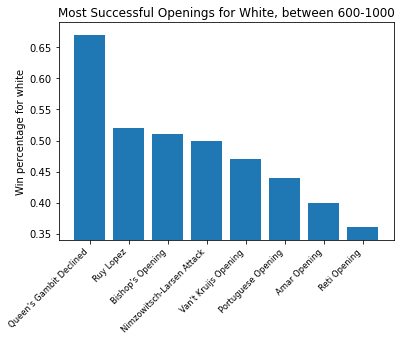

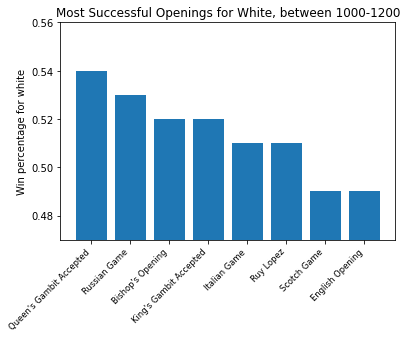

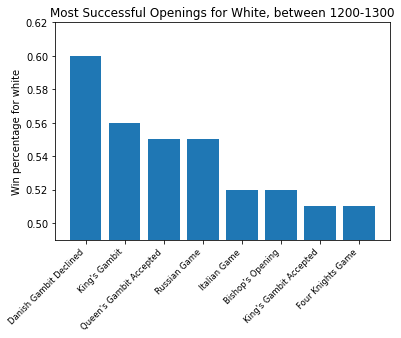

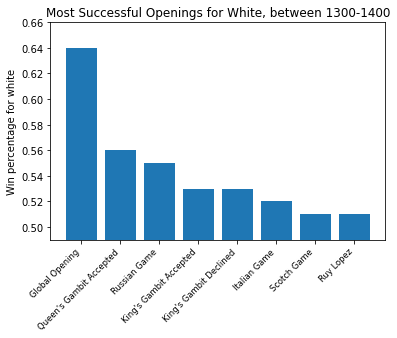

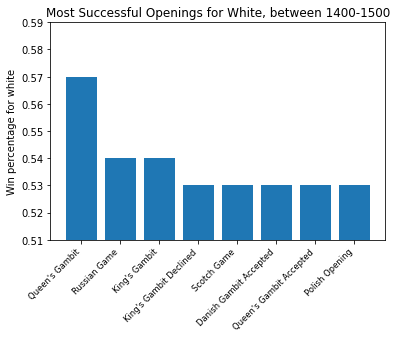

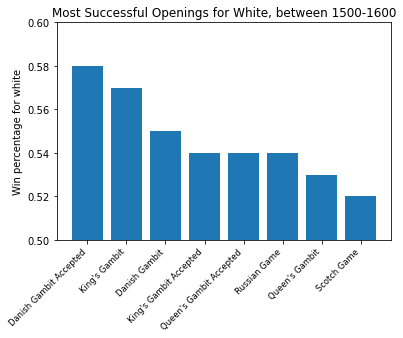

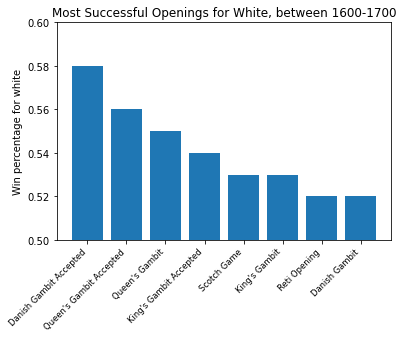

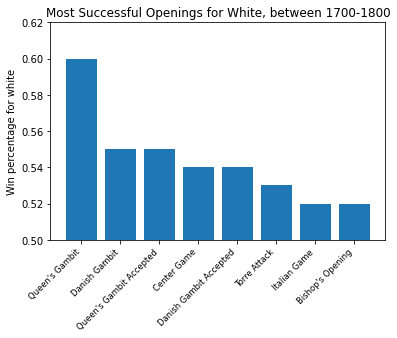

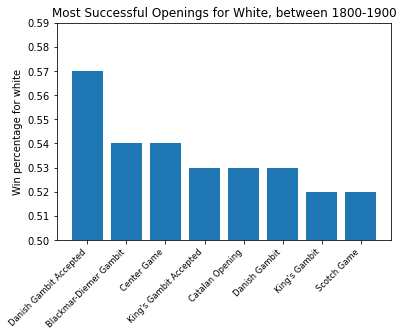

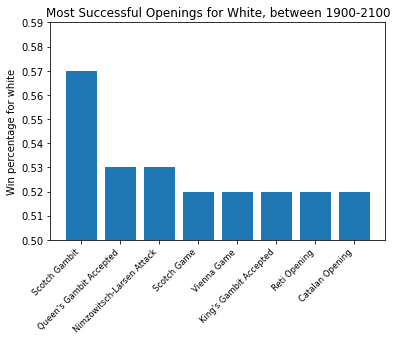

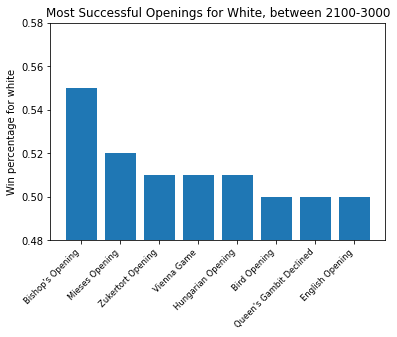

In [303]:
for i in range(len(rating_categorisation)):
  # print(best_openings_ratio_list[rating_categorisation[i]][:8])
  numbers = best_openings_ratio_list[rating_categorisation[i]][:8]
  largest = math.ceil(numbers[0]*100)/100
  if largest >= numbers[0]:
    largest += 0.02
  smallest = math.floor(numbers[-1]*100)/100
  if smallest <= numbers[0]:
    smallest -= 0.02
  limits = [smallest, largest]
  try:
    graph_maker(best_openings_list[rating_categorisation[i]], best_openings_ratio_list[rating_categorisation[i]], f"{rating_categorisation[i]}-{rating_categorisation[i+1]}", limits)
  except:
    graph_maker(best_openings_list[2100], best_openings_ratio_list[2100], f"{2100}-{3000}", limits)

In [304]:
results_cloggers = ["King's Pawn Game", "King's Knight", "Queen's Pawn Game", 
"Queen's Gambit Refused"] 
# openings that I don't want on the data, as they aren't really openings
most_used_openings = {600:[], 1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}
most_used_opening_numbers = {600:[], 1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}

most_used_openings_copy = most_used_openings.copy()

for i in range(len(rating_categorisation)):
  most_used_openings[rating_categorisation[i]] = (nlargest(500, all_openings[rating_categorisation[i]], key=all_openings[rating_categorisation[i]].get))

for i in range(len(rating_categorisation)):
  for j in range(len(most_used_openings[rating_categorisation[i]])):
    if most_used_openings[rating_categorisation[i]][j] not in results_cloggers:
      most_used_openings_copy[rating_categorisation[i]].append(most_used_openings[rating_categorisation[i]][j])


most_used_openings = most_used_openings_copy
for i in range(len(rating_categorisation)):
  for j in range(len(most_used_openings[rating_categorisation[i]])):
    most_used_opening_numbers[rating_categorisation[i]].append(all_openings[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])

"""for i in range(len(rating_categorisation)):
  print(rating_categorisation[i])
  print(most_used_openings[rating_categorisation[i]])
  print(most_used_opening_numbers[rating_categorisation[i]])"""
# this just gets the most popular opening in each category

'for i in range(len(rating_categorisation)):\n  print(rating_categorisation[i])\n  print(most_used_openings[rating_categorisation[i]])\n  print(most_used_opening_numbers[rating_categorisation[i]])'

In [305]:
each_opening_win = {}
for i in range(len(rating_categorisation)):
  for j in range(len(most_used_openings[rating_categorisation[i]])):
    if opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]] < 0.1:
      # print(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])
      opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]] *= 10


    if most_used_openings[rating_categorisation[i]][j] not in each_opening_win:
      each_opening_win[most_used_openings[rating_categorisation[i]][j]] = []
      # print(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])
      each_opening_win[most_used_openings[rating_categorisation[i]][j]].append(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])
    else:
      each_opening_win[most_used_openings[rating_categorisation[i]][j]].append(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])





{"Van't Kruijs Opening": [0.47, 0.46, 0.46, 0.46, 0.47, 0.48, 0.47, 0.47, 0.49, 0.49, 0.49], 'Scandinavian Defense': [0.45999999999999996, 0.48, 0.49, 0.51, 0.5, 0.5, 0.49, 0.49, 0.49, 0.49, 0.48], 'French Defense': [0.41000000000000003, 0.47, 0.48, 0.48, 0.48, 0.48, 0.48, 0.47, 0.48, 0.5, 0.49], 'Sicilian Defense': [0.5, 0.45999999999999996, 0.45999999999999996, 0.47, 0.47, 0.48, 0.47, 0.48, 0.49, 0.49, 0.5], "Bishop's Opening": [0.51, 0.52, 0.52, 0.51, 0.52, 0.51, 0.51, 0.52, 0.51, 0.52, 0.55], 'Philidor Defense': [0.5, 0.51, 0.51, 0.5, 0.51, 0.51, 0.52, 0.52, 0.52, 0.51, 0.49], 'Alekhine Defense': [0.48, 0.5, 0.52, 0.51, 0.5, 0.49, 0.48, 0.44999999999999996, 0.48, 0.49, 0.5], 'Russian Game': [0.52, 0.53, 0.55, 0.55, 0.54, 0.54, 0.5, 0.51, 0.51, 0.47, 0.48], 'Nimzowitsch Defense': [0.5, 0.5, 0.52, 0.51, 0.52, 0.51, 0.49, 0.5, 0.49, 0.47, 0.44999999999999996], 'English Opening': [0.45, 0.49, 0.49, 0.48, 0.51, 0.5, 0.51, 0.5, 0.51, 0.51, 0.5], 'Vienna Game': [0.48, 0.48, 0.47, 0.5, 0.5

In [325]:
# line graphs for each opening.
ratings_boundaries= ["600-1000", "1000-1200", "1200-1300", "1300-1400", "1400-1500", "1500-1600", "1600-1700", "1700-1800","1800-1900" ,"1900-2100", "2100-3000"]
def line_graph_maker(name):
  
  win_percent = each_opening_win[name]
  # print(f"{name} win percent: {win_percent}")
  """  if win_percent[0] < 0.1:
    for i in range(len(win_percent)):
      win_percent[i] *=  10"""


  plt.plot(ratings_boundaries, win_percent, label = name)
  plt.title(name)
  plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='small')
  # plt.grid()
  plt.show()
  

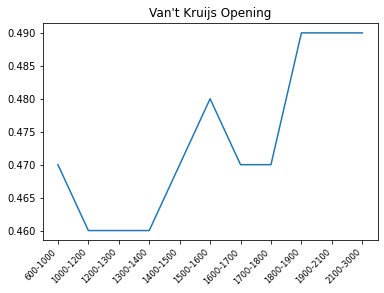

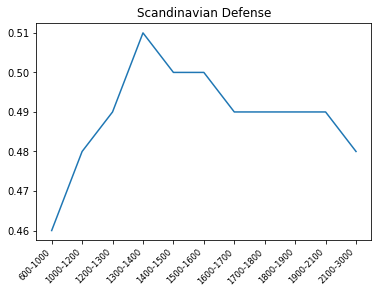

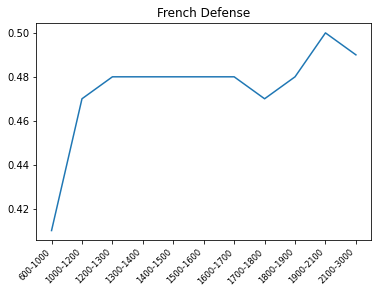

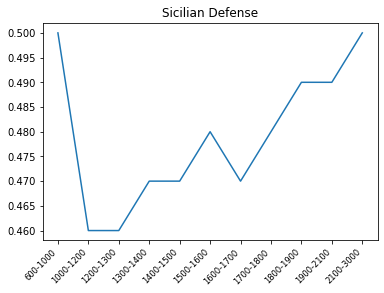

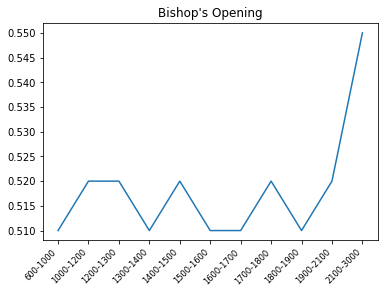

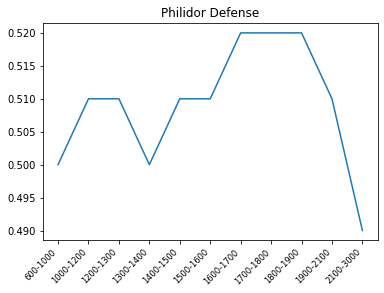

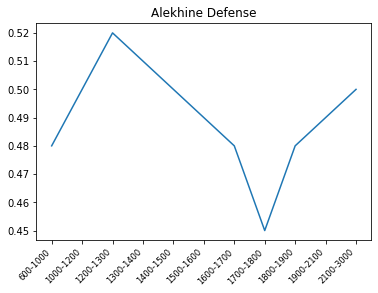

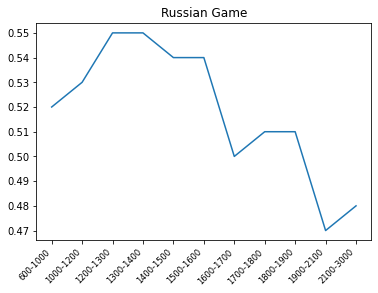

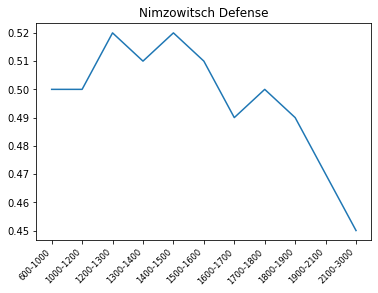

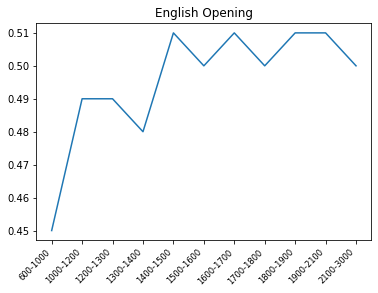

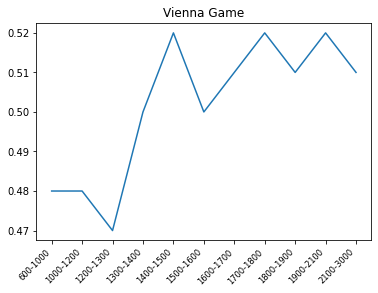

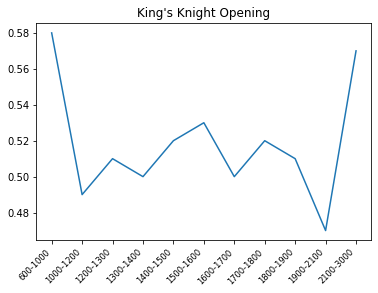

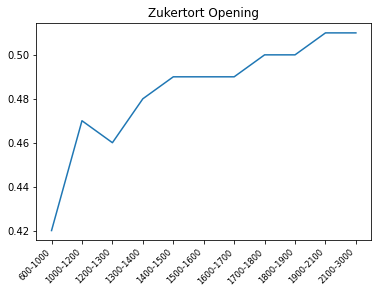

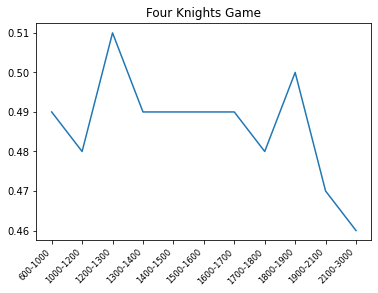

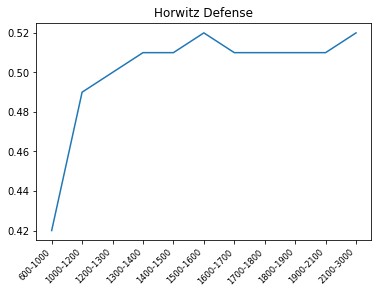

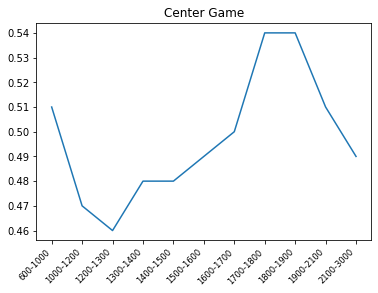

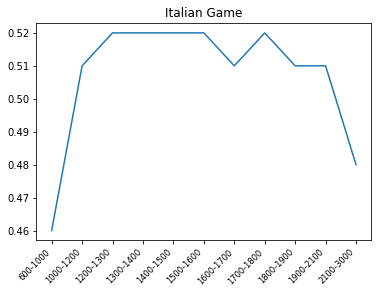

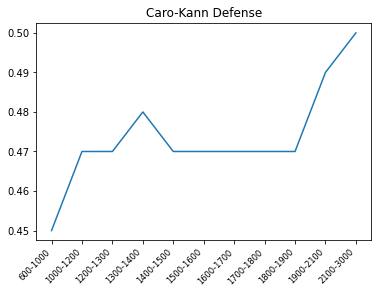

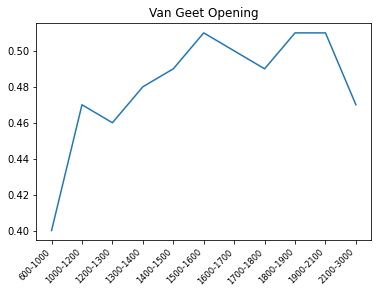

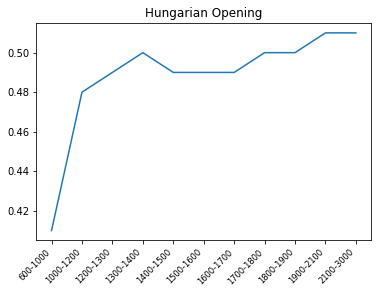

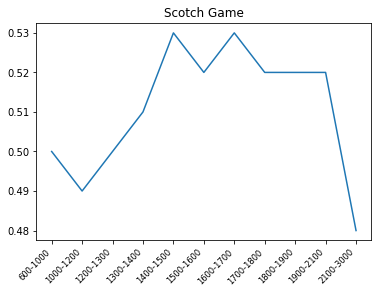

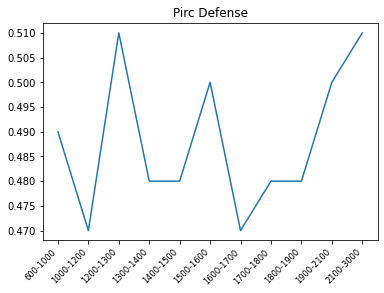

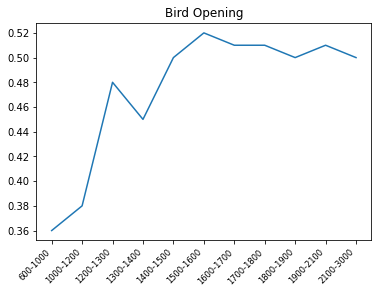

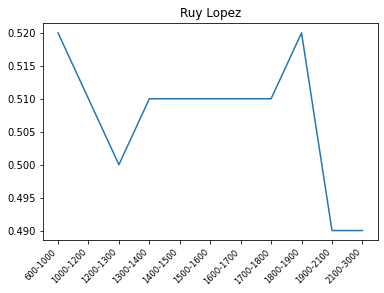

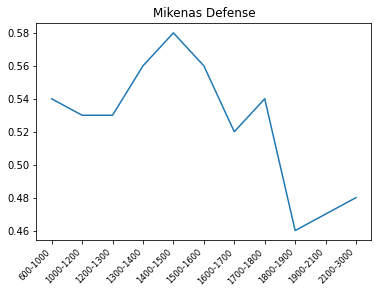

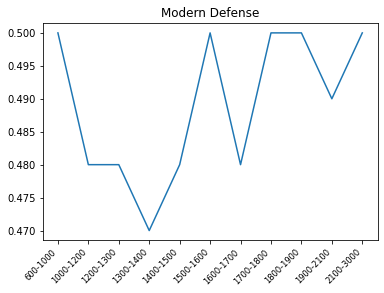

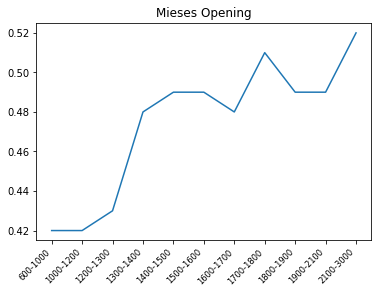

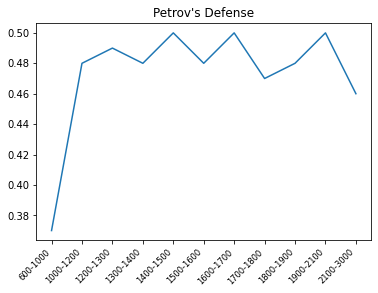

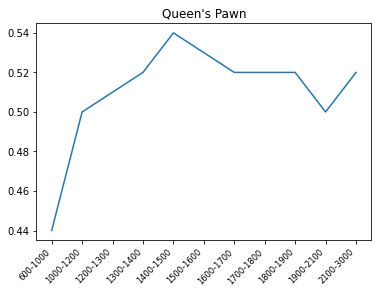

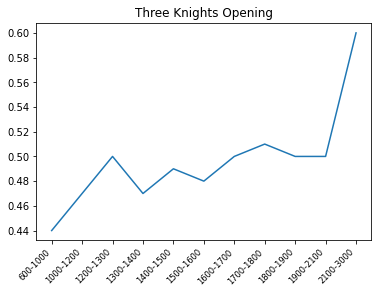

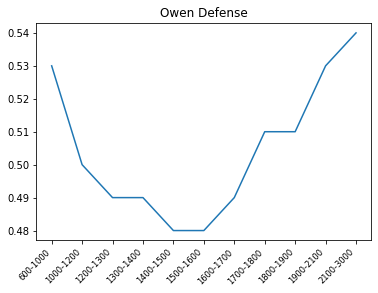

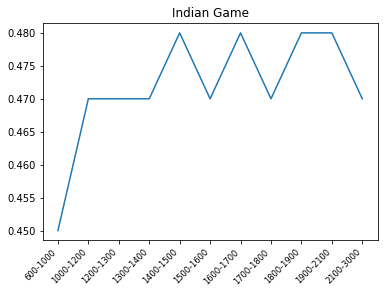

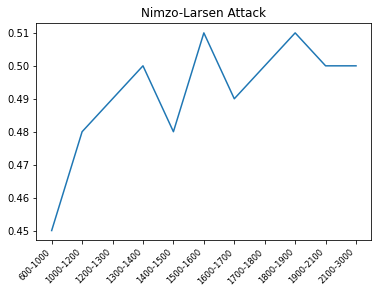

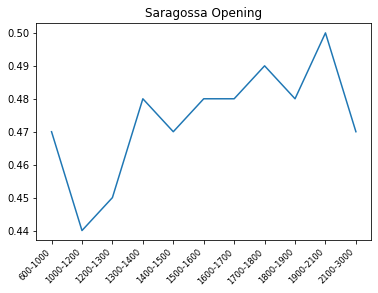

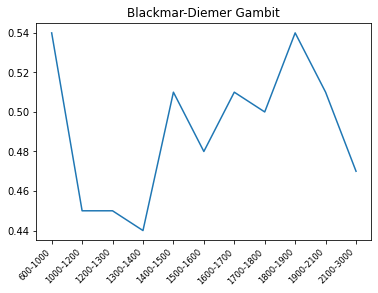

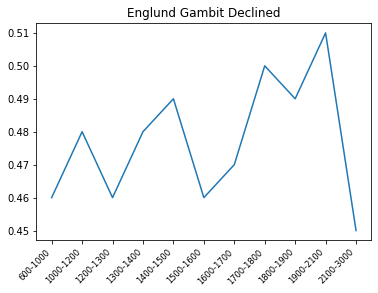

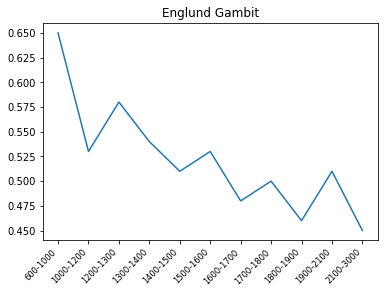

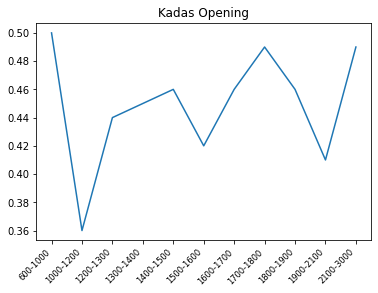

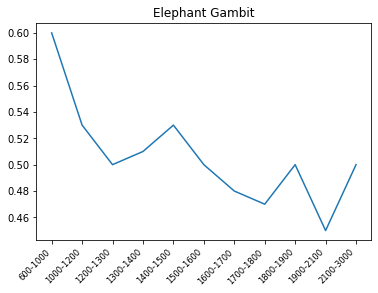

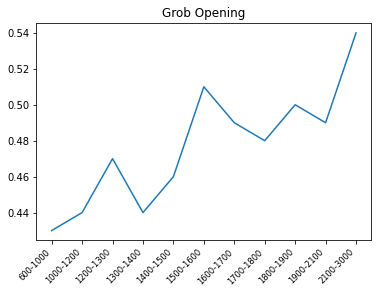

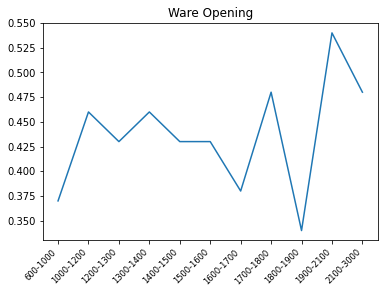

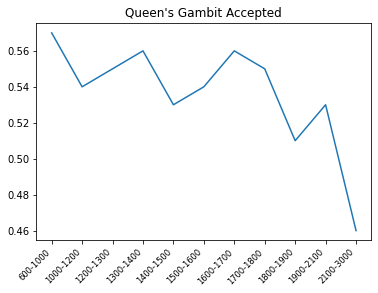

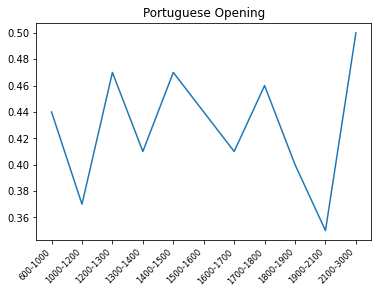

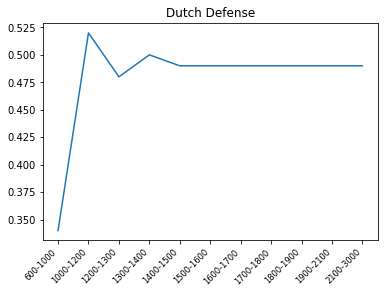

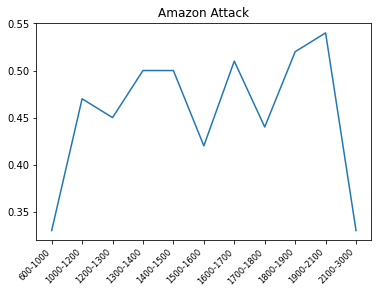

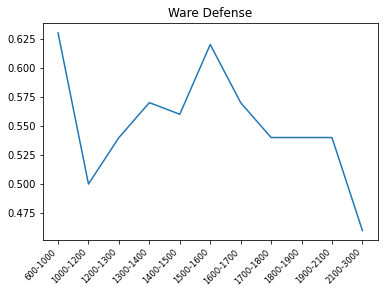

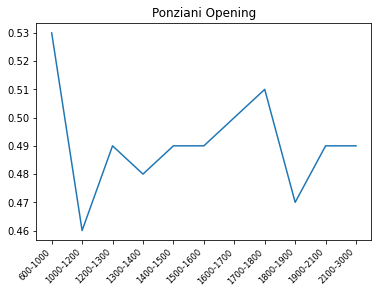

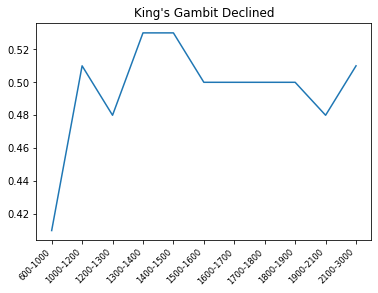

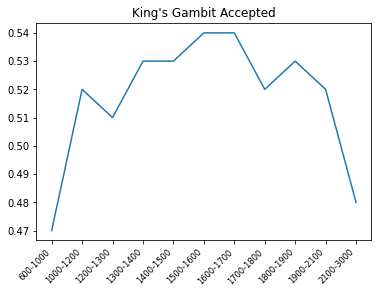

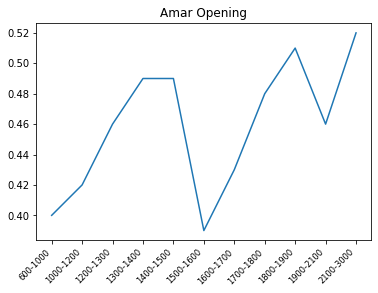

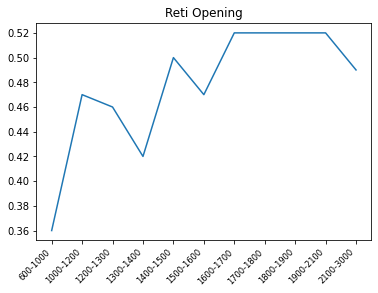

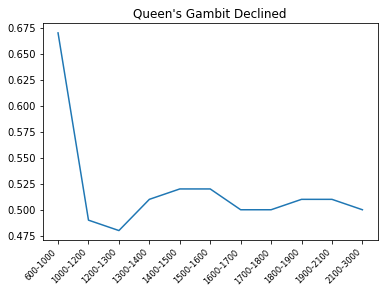

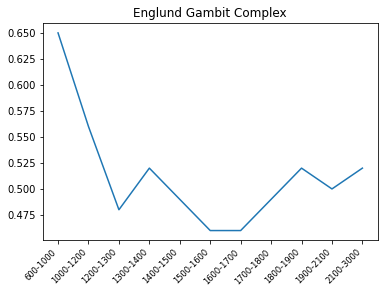

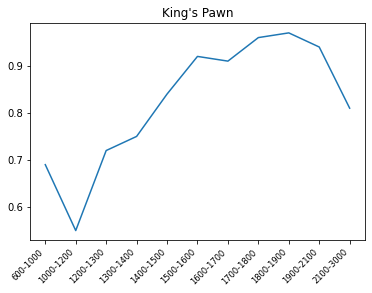

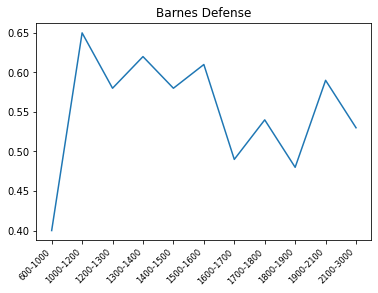

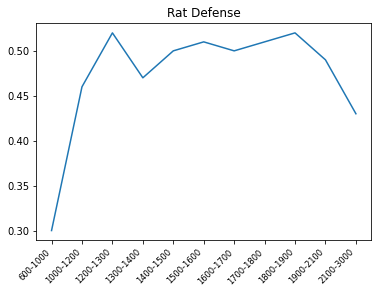

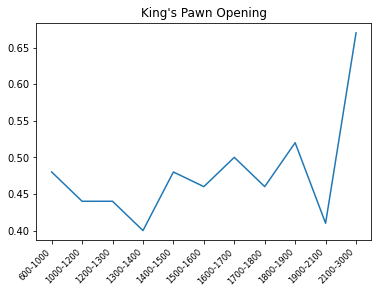

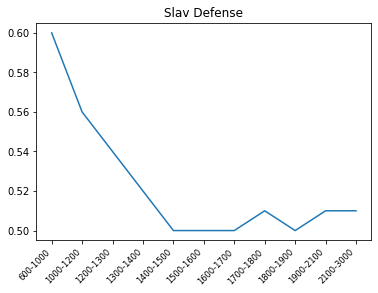

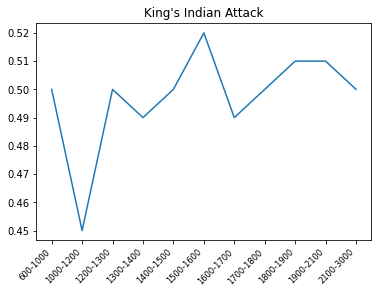

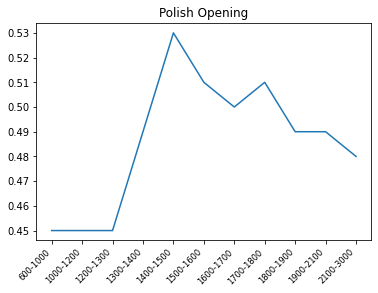

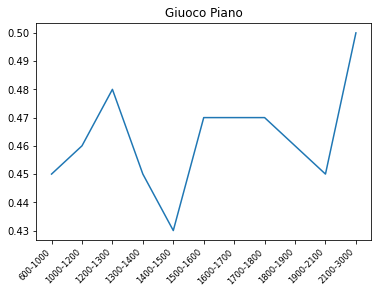

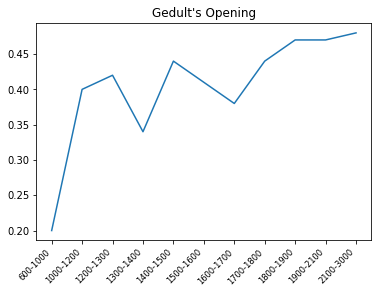

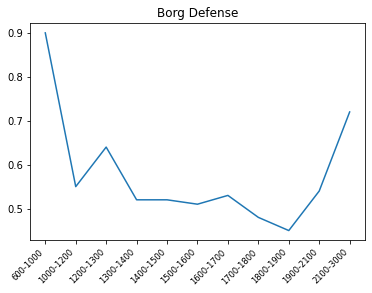

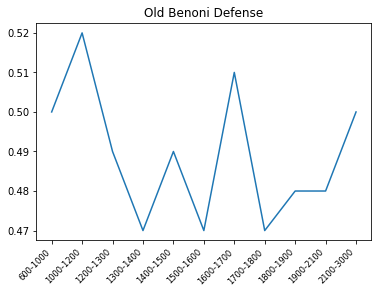

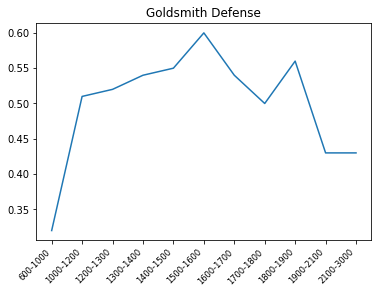

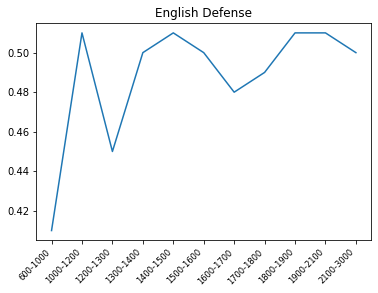

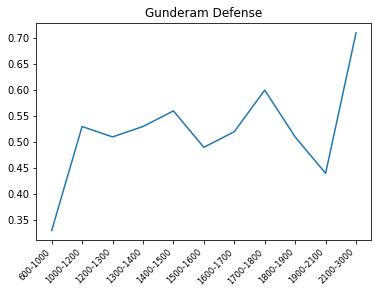

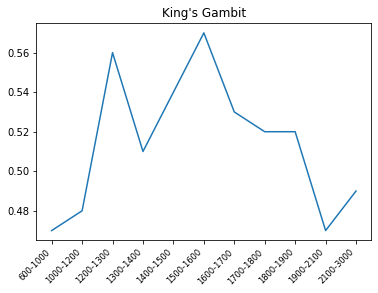

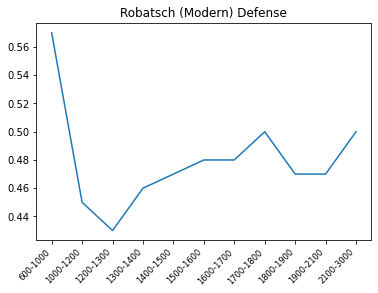

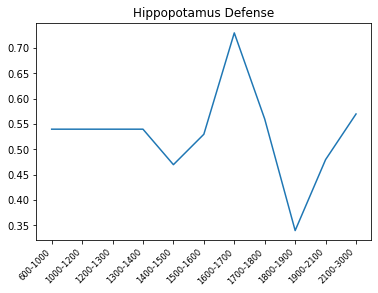

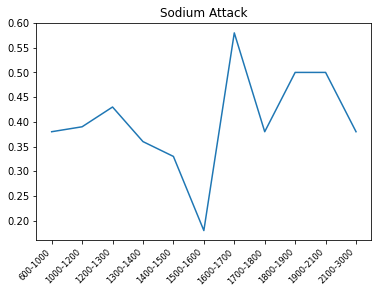

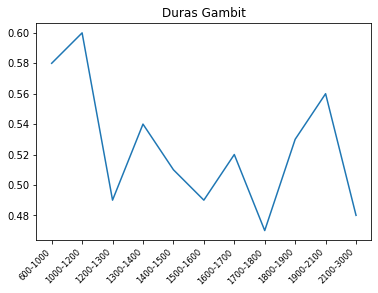

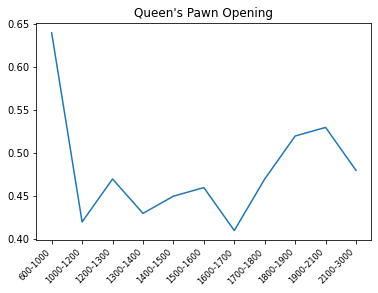

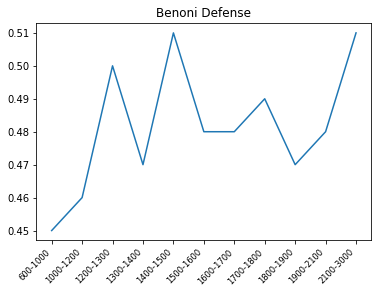

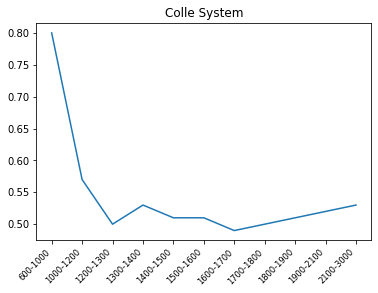

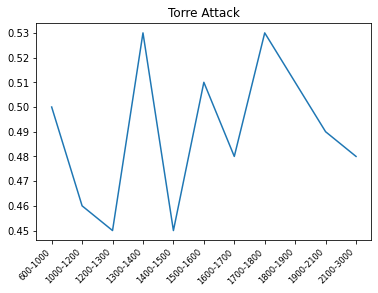

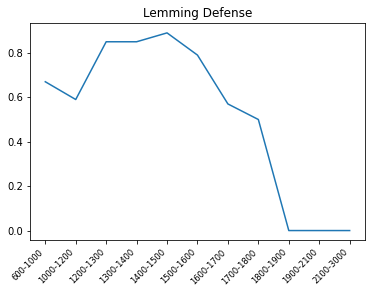

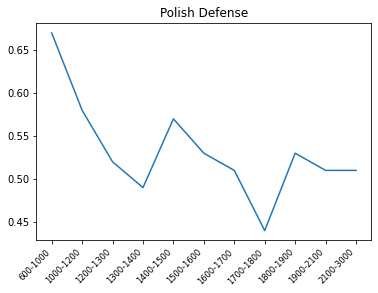

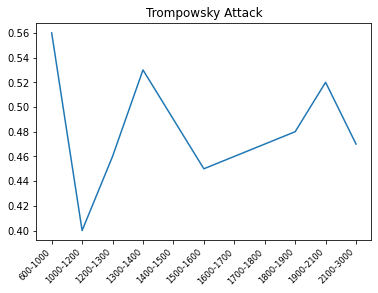

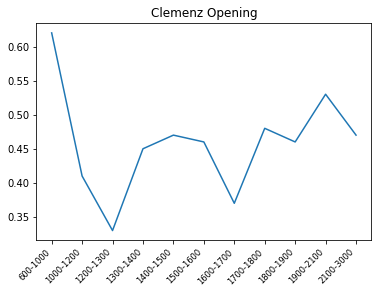

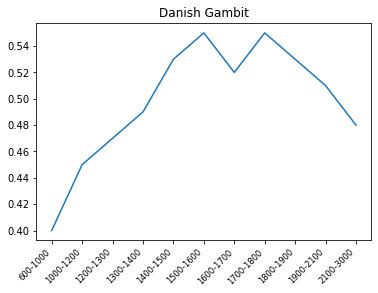

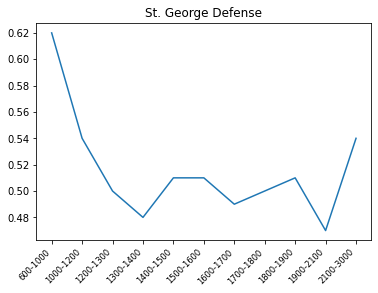

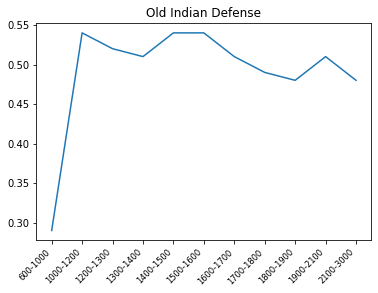

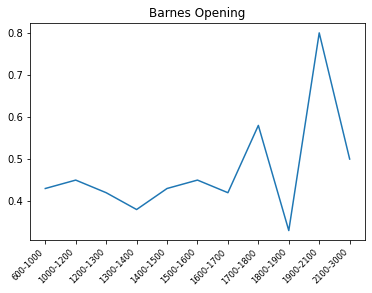

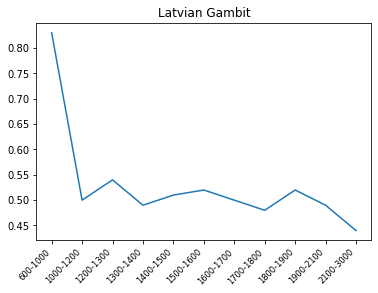

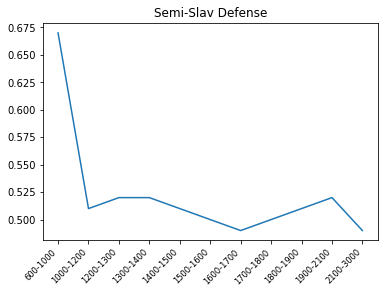

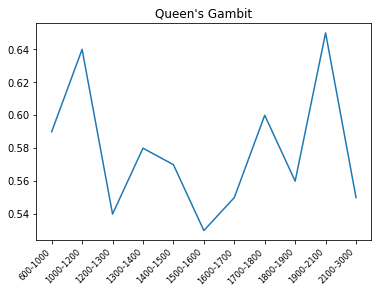

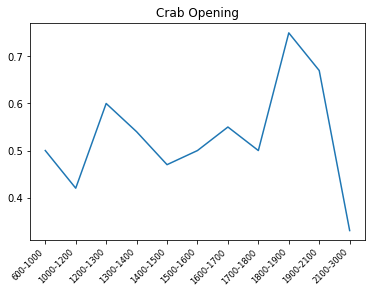

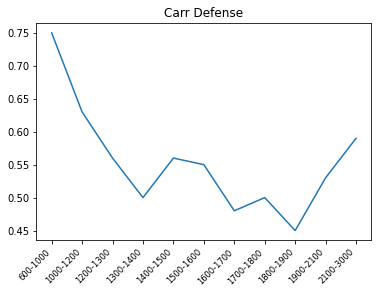

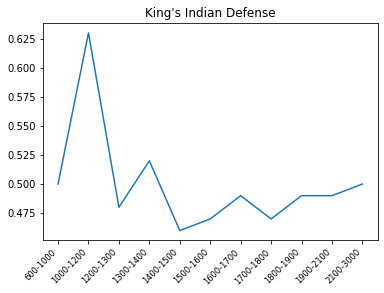

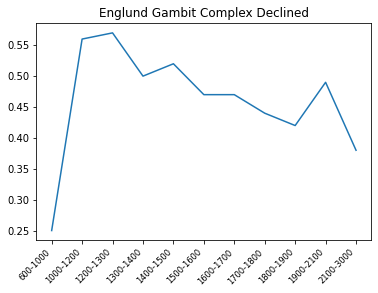

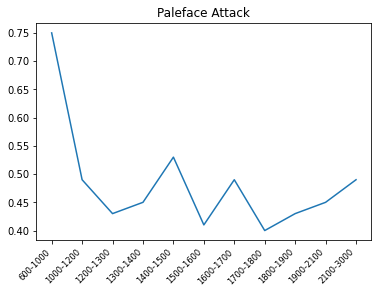

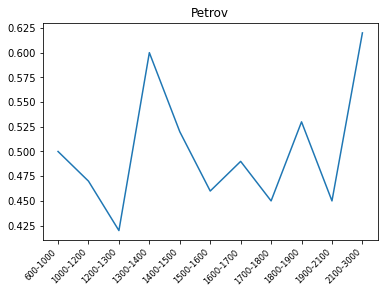

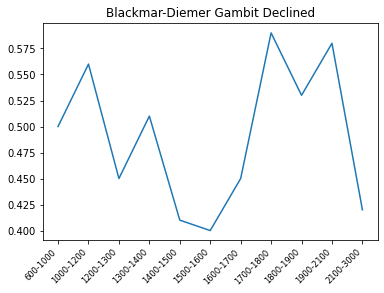

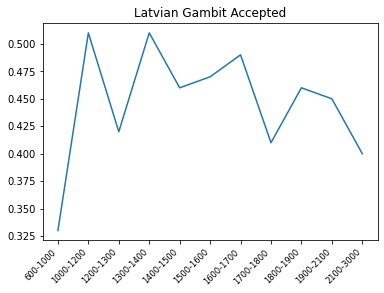

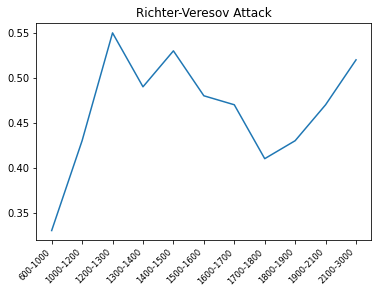

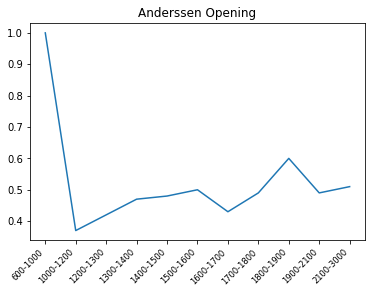

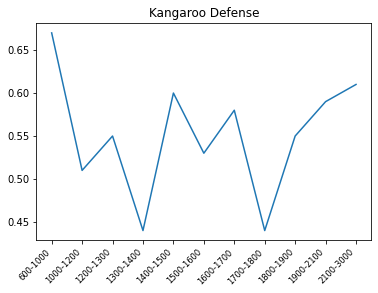

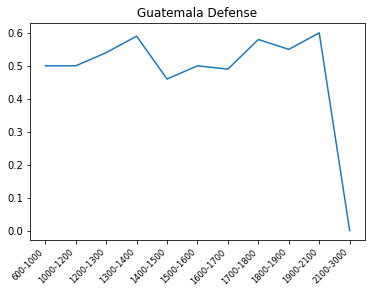

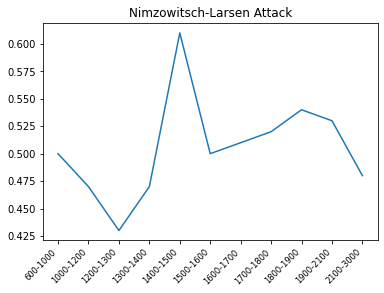

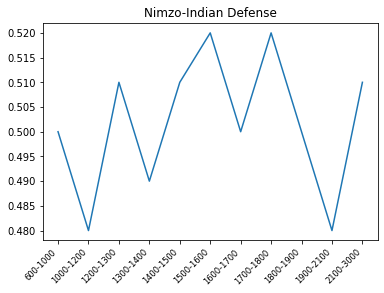

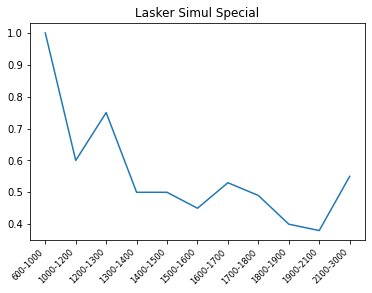

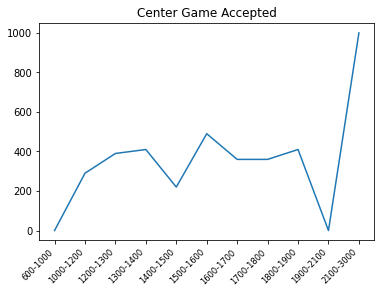

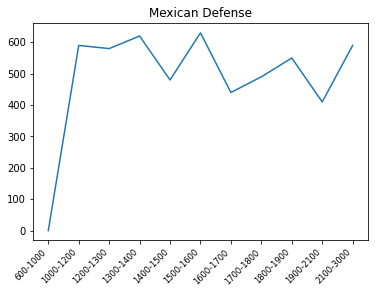

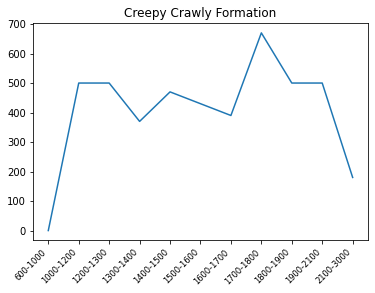

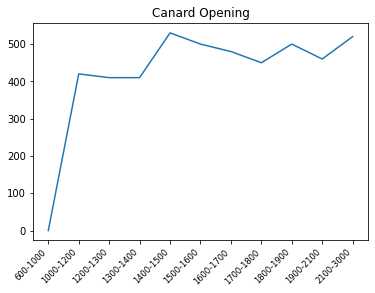

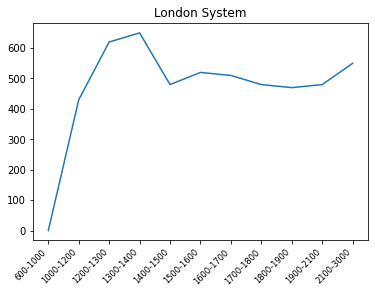

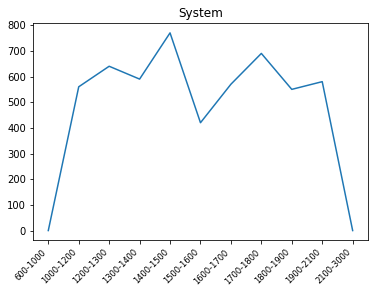

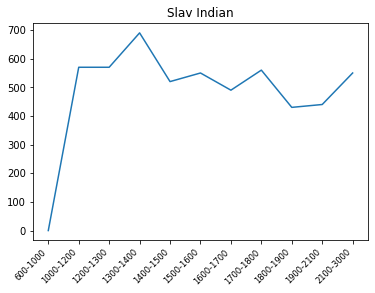

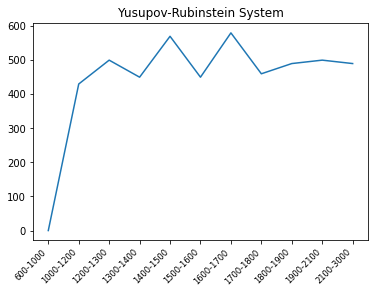

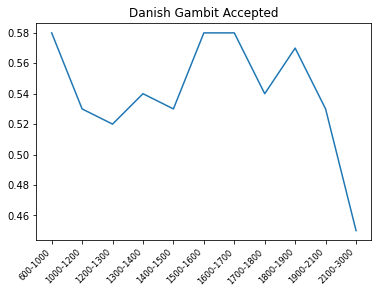

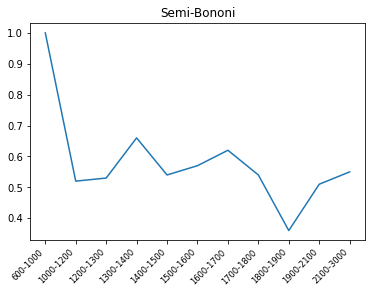

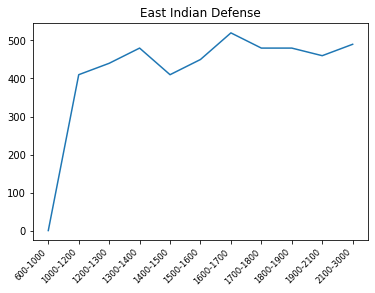

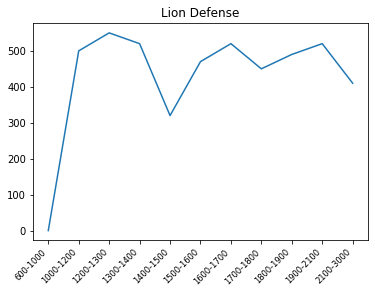

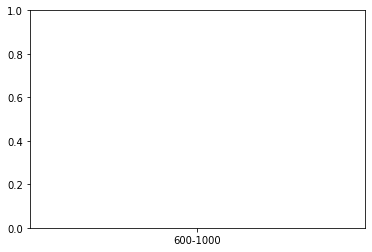

In [326]:
for key, value in each_opening_win.items():
  try:
    line_graph_maker(key)
  except:
    continue


In [399]:

def custom_line_graph_maker(name):
  win_percent = each_opening_win[name]
  if win_percent[0] < 0.09:
    for i in range(len(win_percent)):
      win_percent[i] *=  1000
  if win_percent[0] > 0.7:
    win_percent[0] = win_percent[1] + 0.05
  if win_percent[0] < 0.4:
    win_percent[0] = win_percent[1] - 0.05

  plt.plot(ratings_boundaries, win_percent, label = name)
  plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='small')
  plt.legend()
  plt.rcParams['figure.figsize'] = [10,10]


  # print(f"{name} win percent: {win_percent}")

  # plt.grid()
  # plt.show()



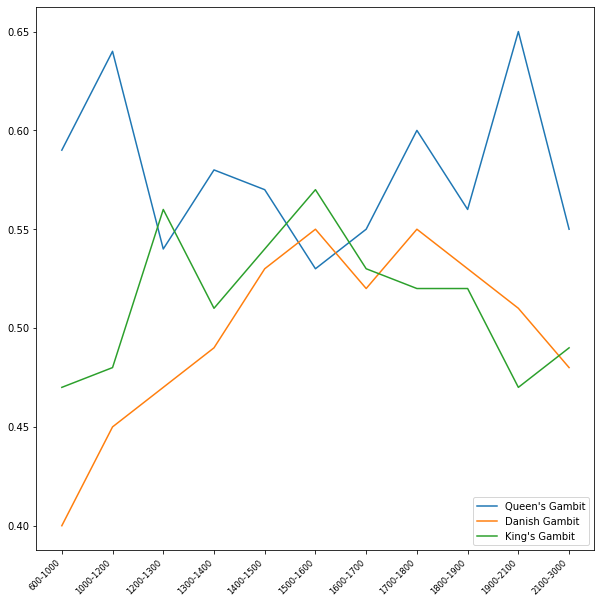

In [400]:
# curated line graphs
titles = ["Queen's Gambit","Danish Gambit", "King's Gambit"]
for i in range(len(titles)):
  custom_line_graph_maker(titles[i])

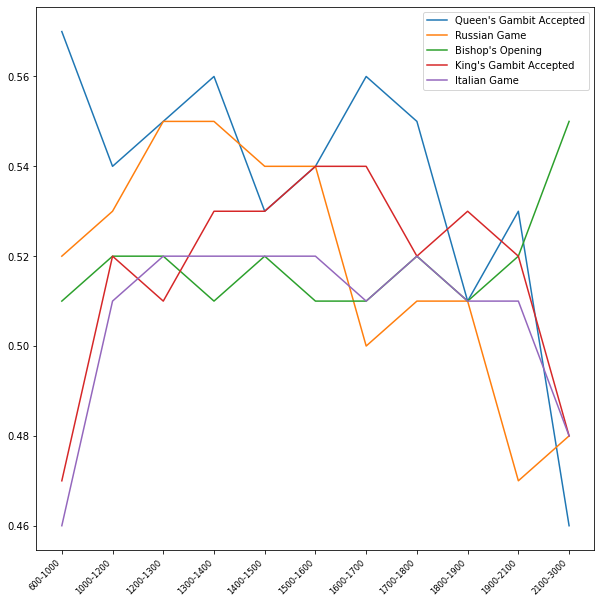

In [401]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[1000][i])

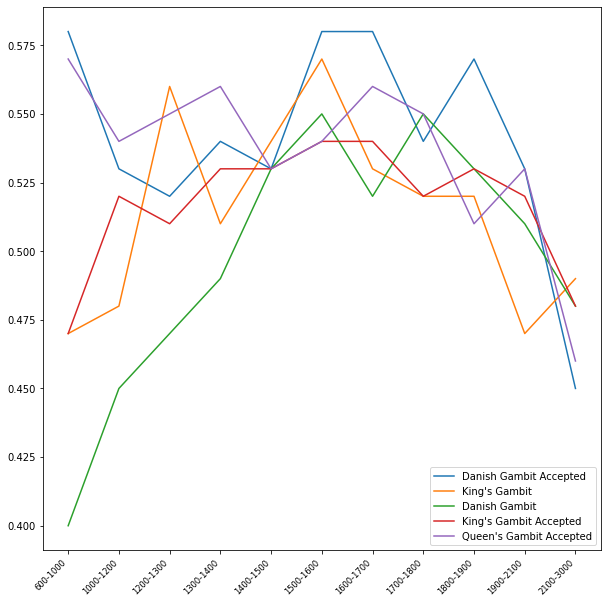

In [408]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[1500][i])

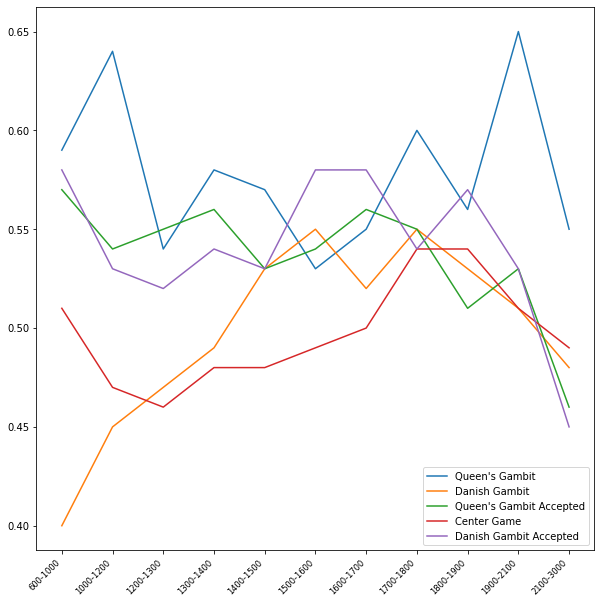

In [409]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[1700][i])

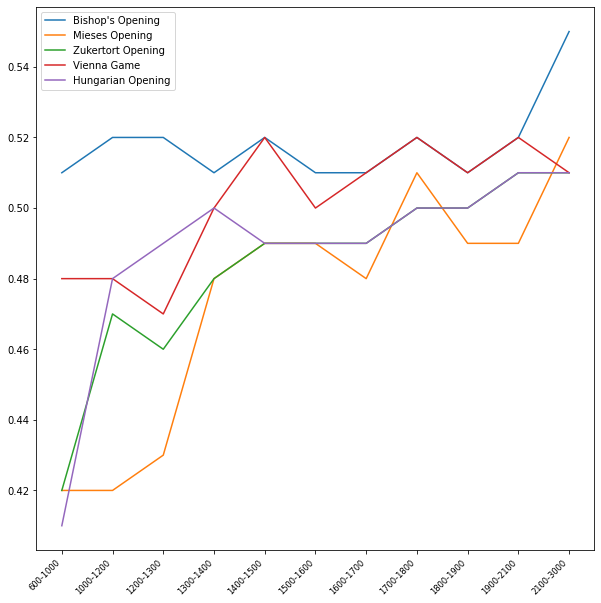

In [410]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[2100][i])


In [411]:
def pop_graph_maker(opening, numbers, band):
  plt.plot(opening, numbers)
  plt.title(f"Most popular openings between {band}")
  plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='small')
  plt.ylabel("Times each opening is played")
  plt.show()

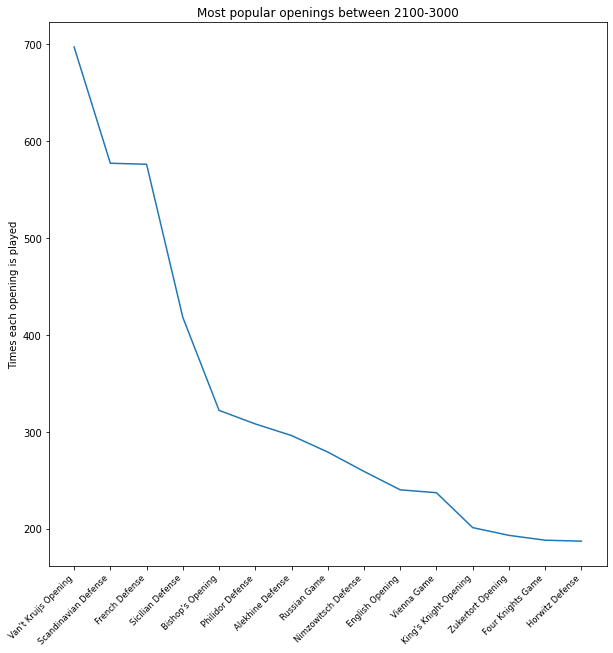

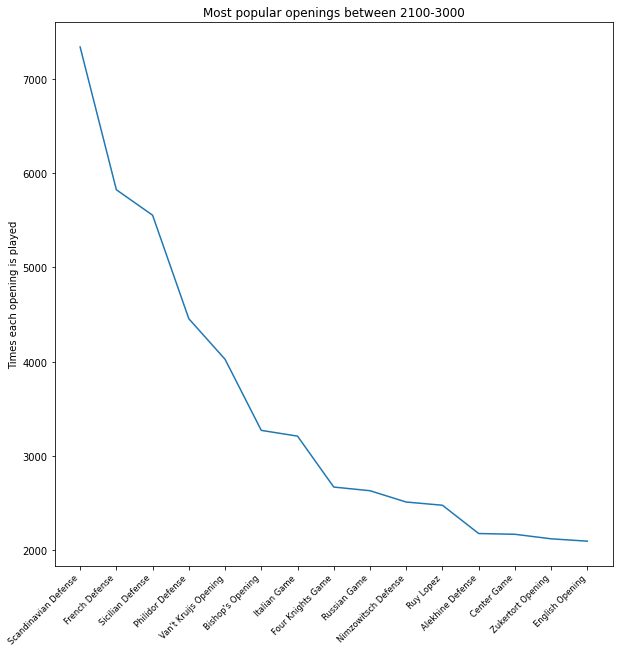

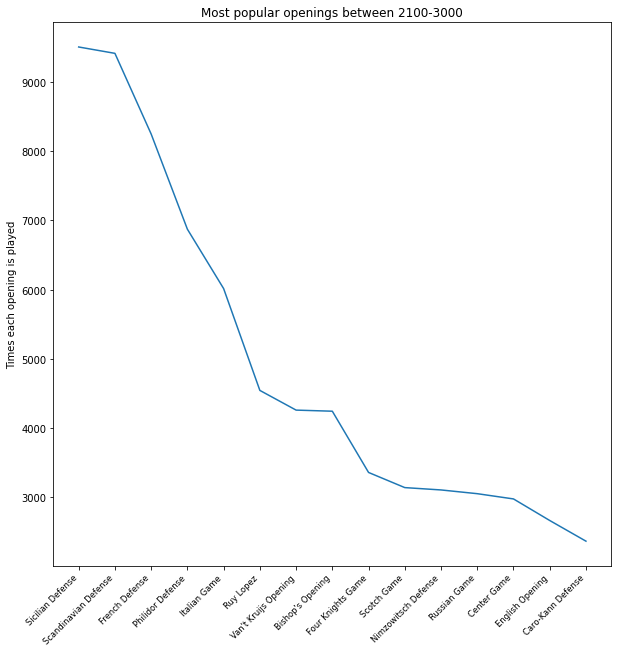

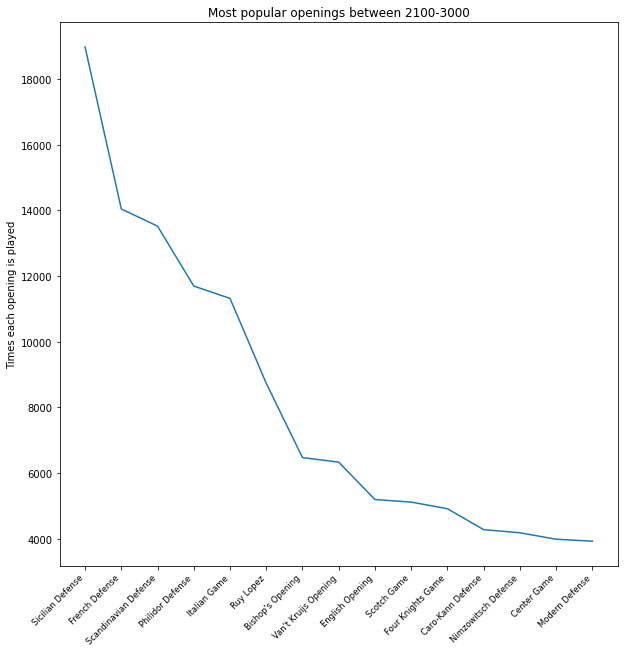

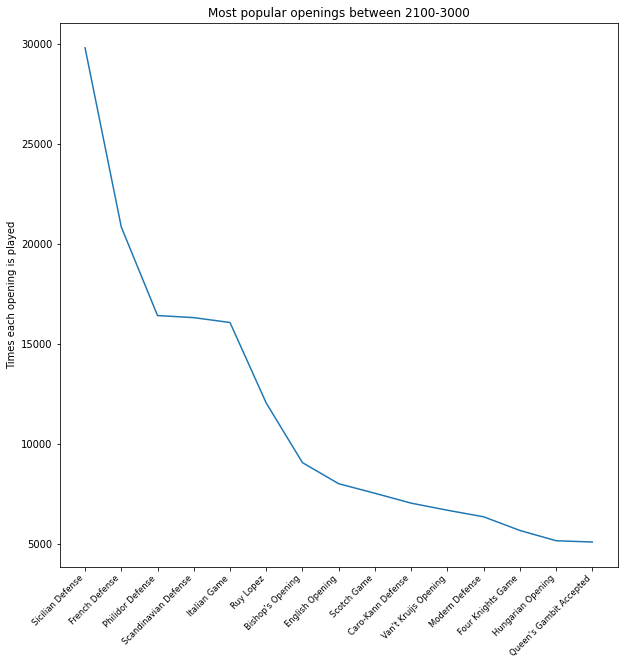

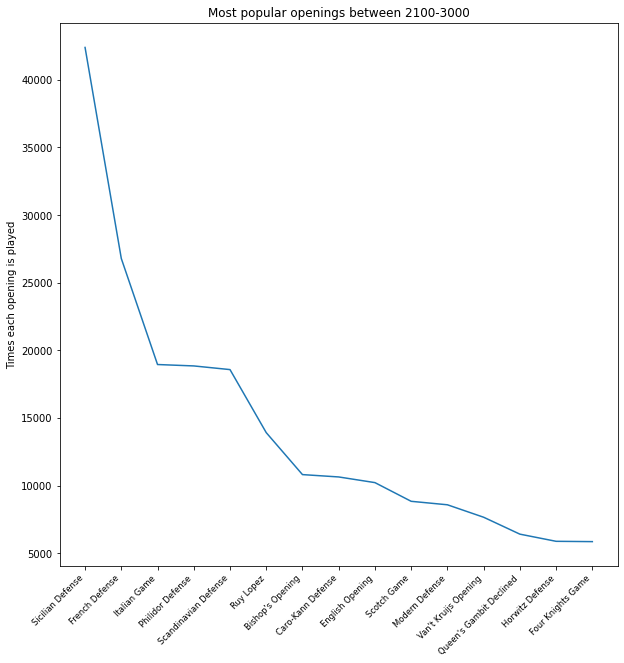

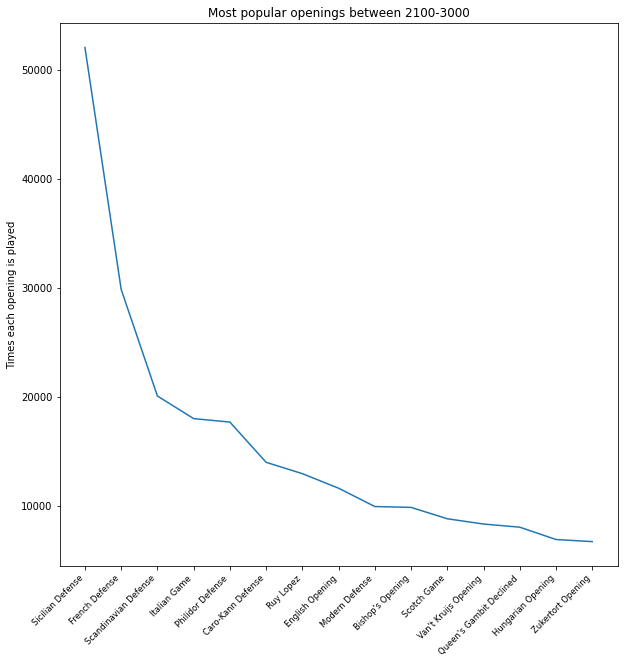

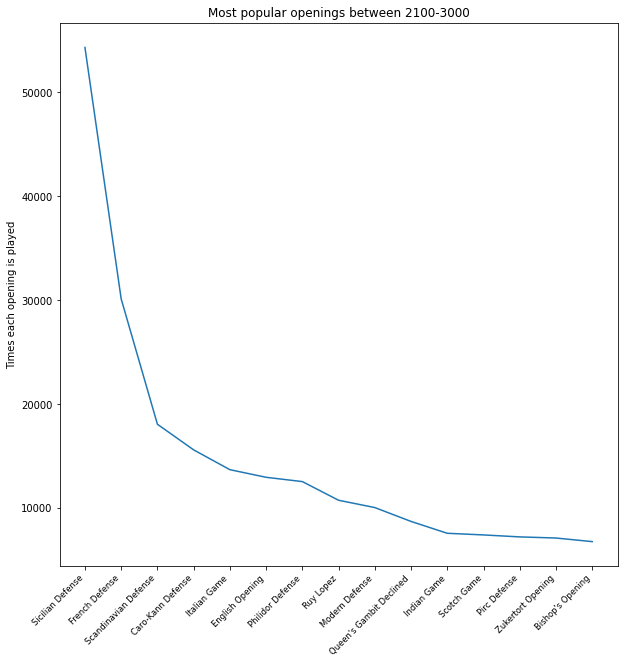

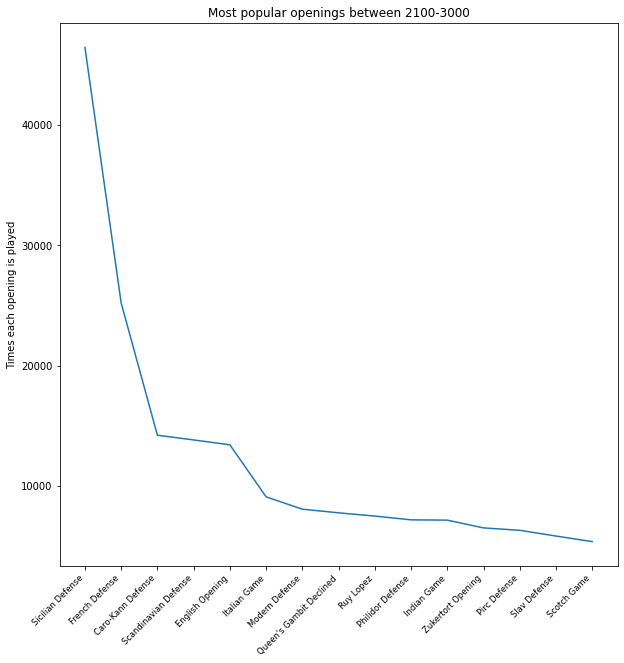

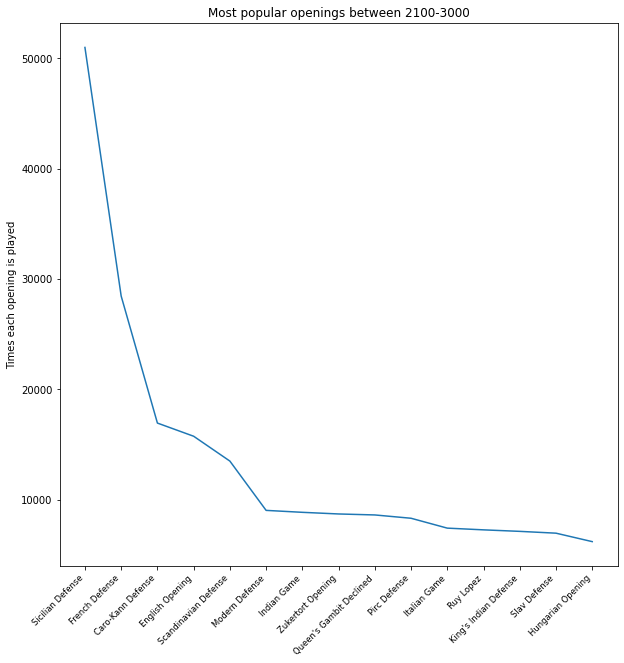

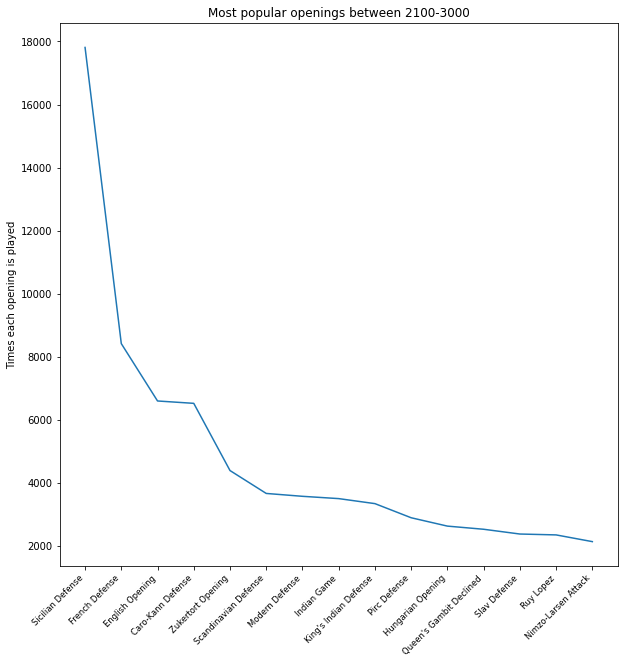

In [417]:
pop_openings_total = {}
for i in range(len(rating_categorisation)):
  try:
    pop_openings = (most_used_openings[rating_categorisation[i]][:15])
    
    pop_openings_numbers = (most_used_opening_numbers[rating_categorisation[i]][:15])
    for j in range(len(pop_openings)):
      if pop_openings[j] in pop_openings_total:
        pop_openings_total[pop_openings[i]] = pop_openings_numbers[i]
      else:
        pop_openings_total[pop_openings[i]] += pop_openings_numbers[i]
        
    pop_graph_maker(pop_openings, pop_openings_numbers , f"{rating_categorisation[i]}-{rating_categorisation[i+1]}")
  except:
    pop_graph_maker(pop_openings, pop_openings_numbers , f"2100-3000")
 

In [418]:
all_open = []
popular_openings_total = {}
for i in range(len(rating_categorisation)):
  popular_openings = (most_used_openings[rating_categorisation[i]])
  popular_openings_numbers = (most_used_opening_numbers[rating_categorisation[i]])
  for j in range(len(popular_openings)):
    if popular_openings[j] not in all_open:
      all_open.append(popular_openings[j])
      popular_openings_total[popular_openings[j]] = popular_openings_numbers[j]
    
    else:
      popular_openings_total[popular_openings[j]] += popular_openings_numbers[j]
most_used_total = (nlargest(20, popular_openings_total, key=popular_openings_total.get))
print(most_used_total)
most_used_total_numbers = []


['Sicilian Defense', 'French Defense', 'Scandinavian Defense', 'Italian Game', 'Philidor Defense', 'Caro-Kann Defense', 'English Opening', 'Ruy Lopez', 'Modern Defense', "Bishop's Opening", "Van't Kruijs Opening", 'Scotch Game', 'Zukertort Opening', "Queen's Gambit Declined", 'Indian Game', 'Pirc Defense', 'Hungarian Opening', 'Horwitz Defense', 'Four Knights Game', 'Nimzowitsch Defense']


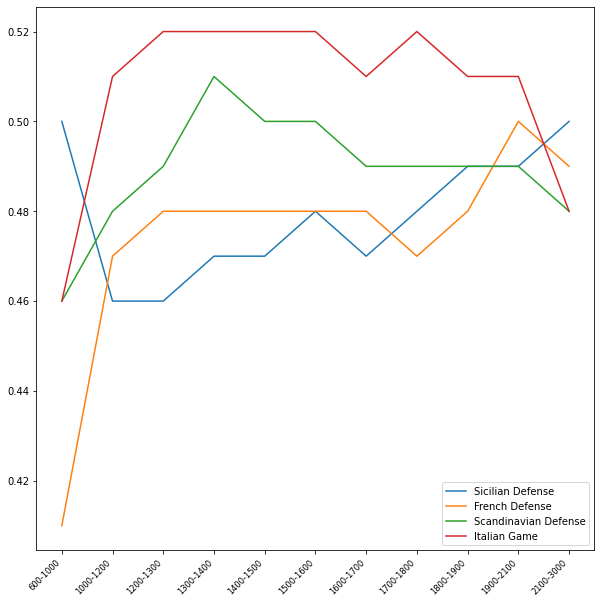

In [419]:
for i in range(4):
  custom_line_graph_maker(most_used_total[i])

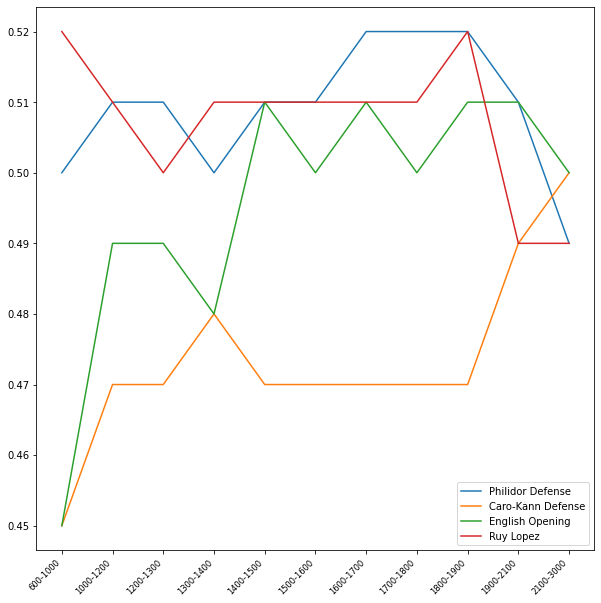

In [420]:
for i in range(4):
  custom_line_graph_maker(most_used_total[i+4])

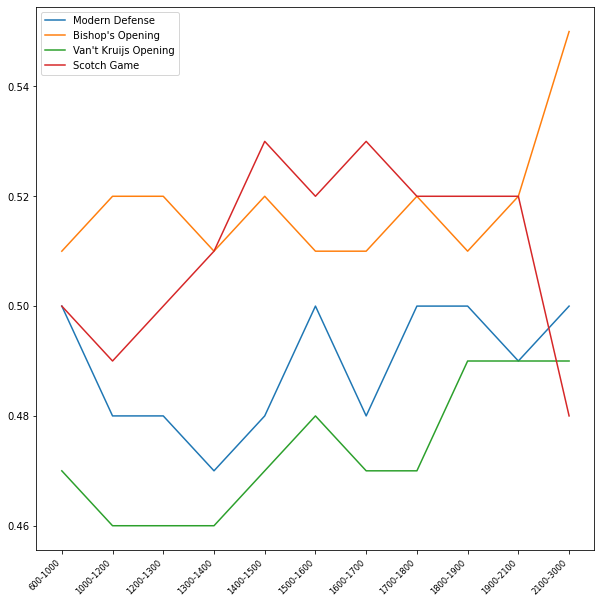

In [421]:
for i in range(4):
  custom_line_graph_maker(most_used_total[i+8])